# Mine into subgroup 1. Extract minigroups with high concentration of PHAs

In [1]:
%matplotlib inline
import string

import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle, sys, os, time
import numpy as np
import pydotplus
import pandas as pd
import scipy.stats as ss
from sklearn import neighbors, svm
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing as pp
from sklearn import tree

import read_database as rdb
import generate_orbits as go
import learn_data as ld
import visualize_data as vd
import asterion_learn as al
from  copy import deepcopy

font = {'size': 14}
mpl.rc('font', **font)

**Prepare plot labels**

** Load generated and real NEAs from subgroup #1 **

In [2]:
dumps_gen_sg1 = ['./asteroid_data/haz_gen_sg1.p', 
                 './asteroid_data/nohaz_gen_sg1.p',
                 './asteroid_data/haz_gen_sg1_rest.p', 
                 './asteroid_data/nohaz_gen_sg1_rest.p']
            
dumps_genu = ['./asteroid_data/haz_genu_sg1.p', 
              './asteroid_data/nohaz_genu_sg1.p',
              './asteroid_data/haz_genu_sg1_rest.p', 
              './asteroid_data/nohaz_genu_sg1_rest.p']
         
dumps_real = ['./asteroid_data/haz_test.p', 
              './asteroid_data/nohaz_test.p']

haz_gen, nohaz_gen, haz_gen_rest, nohaz_gen_rest = map(rdb.loadObject, dumps_gen_sg1)
haz_genu, nohaz_genu, haz_genu_rest, nohaz_genu_rest = map(rdb.loadObject, dumps_genu)

haz_real, nohaz_real = map(rdb.loadObject, dumps_real)
# haz_gen_full = rdb.loadObject('./asteroid_data/haz_rand_2e5.p')
# nohaz_gen_full = rdb.loadObject('./asteroid_data/nohaz_rand_2e5.p')

** Investigate distributions of orbital parameters for the subgroup #1 **

In [3]:
# datasets_gen = [haz_gen, nohaz_gen]
# datasets_genu = [haz_genu, nohaz_genu]
# datasets_real = [haz_real, nohaz_real]

In [4]:
# vd.display_allparams([haz_gen, nohaz_gen], vd.combs, vd.colnames)

In [5]:
# reload(vd)
# vd.display_allparams(datasets_genu, vd.combs, vd.colnames)

** Draw cutting plane **

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


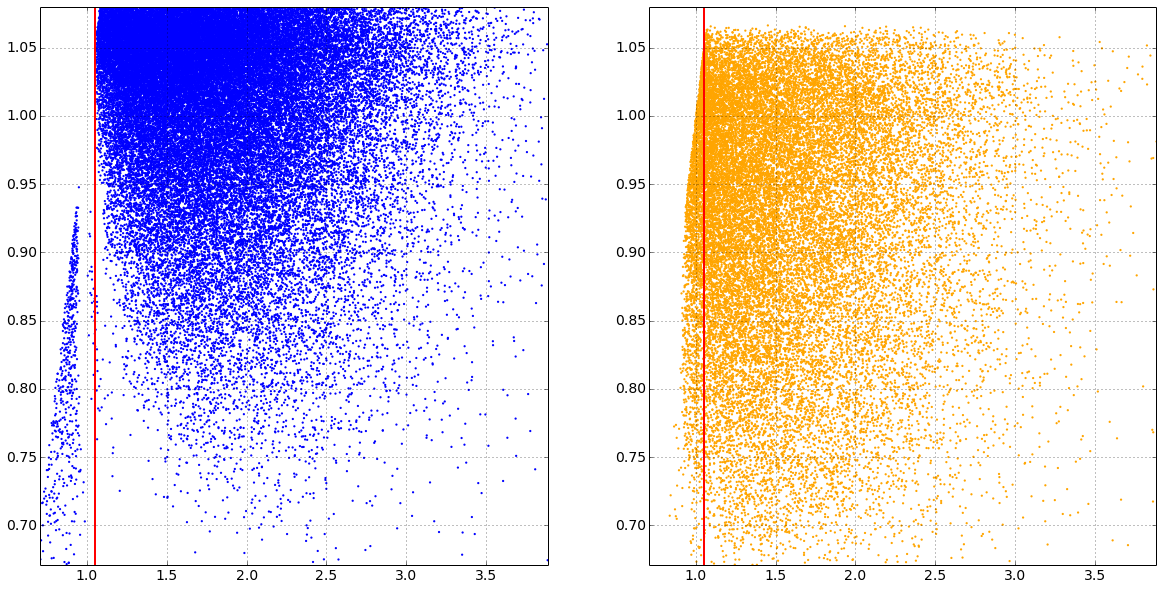

In [6]:
reload(vd)
cutcol = ['a', 'q']
a_split = 1.05
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen, nohaz_gen])
haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
p1, p2 = [[a_split, 0.0], [a_split, 360.0]]
vd.linearcut_plot(p1, p2, haz_gen_cut, nohaz_gen_cut)

In [7]:
# haz_genu_cut, nohaz_genu_cut = ld.cut_2params(cutcol, [haz_genu, nohaz_genu])
# haz_genu_cut, nohaz_genu_cut = ld.cut_params(haz_genu, nohaz_genu, cutcol)
# vd.linearcut_plot(p1, p2, haz_genu_cut, nohaz_genu_cut)

** Split asteroids of sg1 into 2 minigroups by the value of semimajor axis **

In [8]:
haz_gen_sg1a, haz_gen_sg1x = ld.split_by_colval(haz_gen, 'a', a_split)
nohaz_gen_sg1a, nohaz_gen_sg1x = ld.split_by_colval(nohaz_gen, 'a', a_split)

haz_genu_sg1a, haz_genu_sg1x = ld.split_by_colval(haz_genu, 'a', a_split)
nohaz_genu_sg1a, nohaz_genu_sg1x = ld.split_by_colval(nohaz_genu, 'a', a_split)

In [9]:
# vd.display_allparams([haz_gen_sg1a, nohaz_gen_sg1a], vd.combs, vd.colnames)

In [10]:
# vd.display_allparams([haz_gen_sg1b, nohaz_gen_sg1b], vd.combs, vd.colnames)

## Analyze minigroup sg1a
### Extract PHA belt from minigroup sg1a

** Amplify distribution by the symmetric copies of the dataset **

In [11]:
# haz_gen_sg1a_symextend = ld.add_doublemirror_column(haz_gen_sg1a, 'w', 180.0)
# nohaz_gen_sg1a_symextend = ld.add_doublemirror_column(nohaz_gen_sg1a, 'w', 180.0)

In [12]:
# vd.display_param2d(cutcol, labels, [haz_genu_sg1a_symextend, nohaz_genu_sg1a_symextend])

In [13]:
# vd.display_allparams([haz_genu_sg1a_symextend, nohaz_genu_sg1a_symextend], vd.combs, vd.colnames)

In [14]:
# xs = gen_sg1a_extr_cut[:,0]
# ys = gen_sg1a_extr_cut[:,1]
# zs = gen_sg1a_extr_cut[:,2]
# print xs[:10]
# print ys[:10]
# print zs[:10]

In [15]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# %matplotlib auto
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs, ys, zs, c='r', marker='o', lw=0, alpha=1.0, s=10)
# plt.show()

## Analyze minigroup sg1b
### Extract PHA belt from minigroup sg1b

In [16]:
# vd.display_allparams([haz_gen_sg1b, nohaz_gen_sg1b], vd.combs, vd.colnames)

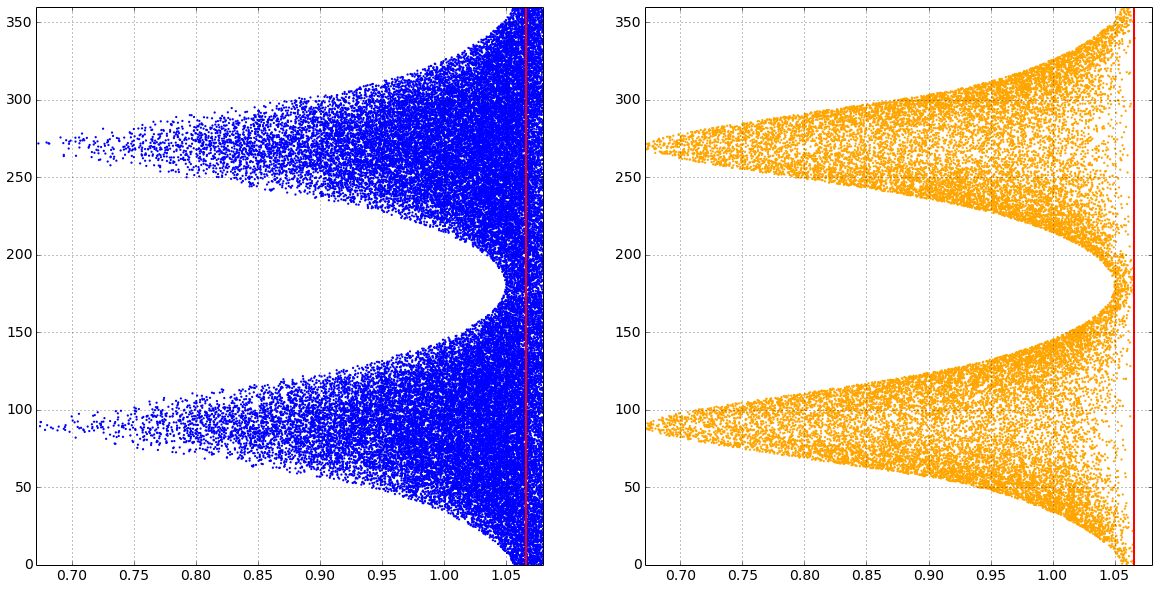

In [142]:
reload(ld)
q_split = 1.066
# q_split = 1.02
cutcol = ['q', 'w']
haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen_sg1x, nohaz_gen_sg1x, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[q_split, 0.0], [q_split, 360.0]]
vd.linearcut_plot(p1, p2, haz_gen_cut, nohaz_gen_cut)

In [143]:
haz_gen_sg1b, haz_gen_sg1z = ld.split_by_colval(haz_gen_sg1x, 'q', q_split)
nohaz_gen_sg1b, nohaz_gen_sg1z = ld.split_by_colval(nohaz_gen_sg1x, 'q', q_split)

haz_genu_sg1b, haz_genu_sg1z = ld.split_by_colval(haz_genu_sg1x, 'q', q_split)
nohaz_genu_sg1b, nohaz_genu_sg1z = ld.split_by_colval(nohaz_genu_sg1x, 'q', q_split)

In [144]:
# vd.display_allparams([haz_gen_sg1b, nohaz_gen_sg1b], vd.combs, vd.colnames)

In [145]:
haz_gen_sg1x_se = ld.add_doublemirror_column(haz_gen_sg1x, 'w', 180.0)
nohaz_gen_sg1x_se = ld.add_doublemirror_column(nohaz_gen_sg1x, 'w', 180.0)

In [146]:
# haz_gen_sg1b_se = ld.add_doublemirror_column(haz_gen_sg1b, 'w', 180.0)
# nohaz_gen_sg1b_se = ld.add_doublemirror_column(nohaz_gen_sg1b, 'w', 180.0)

In [147]:
# haz_genu_sg1b_se = ld.add_doublemirror_column(haz_genu_sg1b, 'w', 180.0)
# nohaz_genu_sg1b_se = ld.add_doublemirror_column(nohaz_genu_sg1b, 'w', 180.0)

## Split by q

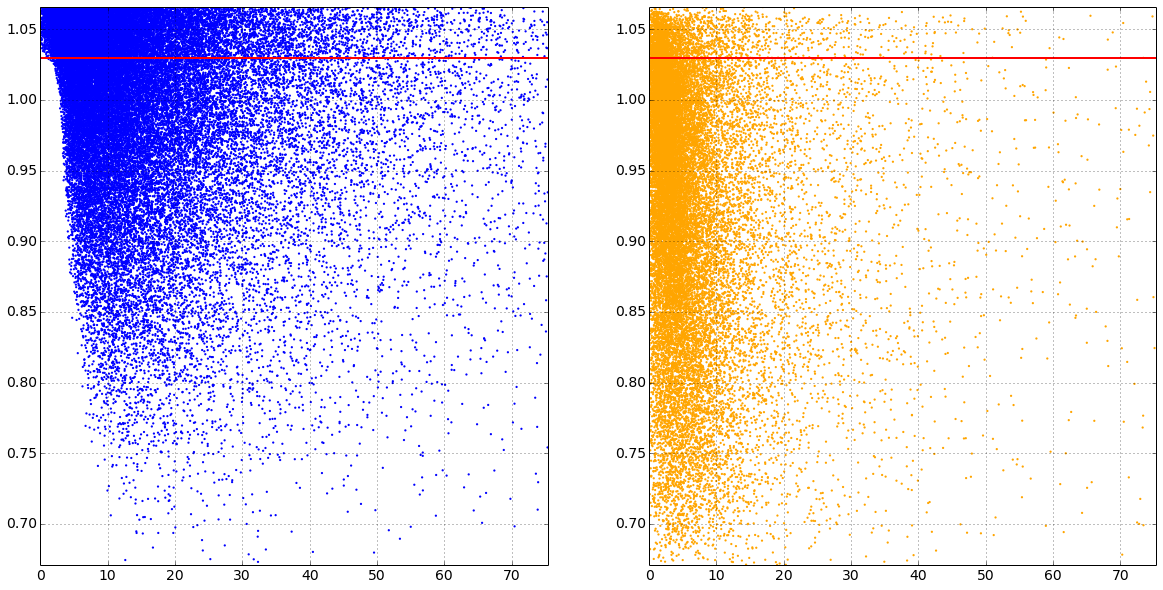

In [149]:
# q_split = 1.066
# q_split = 1.02
q_split = 1.03
# q_split = 1.00
cutcol = ['i', 'q']
haz_gen_sg1b_cut, nohaz_gen_sg1b_cut = ld.cut_params(haz_gen_sg1b, nohaz_gen_sg1b, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
# p1, p2 = [[q_split, 0.0], [q_split, 360.0]]
p1, p2 = [[0, q_split], [90, q_split]]
vd.linearcut_plot(p1, p2, haz_gen_sg1b_cut, nohaz_gen_sg1b_cut)

In [150]:
haz_gen_sg1b, haz_gen_sg1c = ld.split_by_colval(haz_gen_sg1b, 'q', q_split)
nohaz_gen_sg1b, nohaz_gen_sg1c = ld.split_by_colval(nohaz_gen_sg1b, 'q', q_split)

In [151]:
# vd.display_allparams([haz_gen_sg1b, nohaz_gen_sg1b], vd.combs, vd.colnames)

In [152]:
# vd.display_allparams([haz_gen_sg1c, nohaz_gen_sg1c], vd.combs, vd.colnames)

## Split apollos by q-i plane

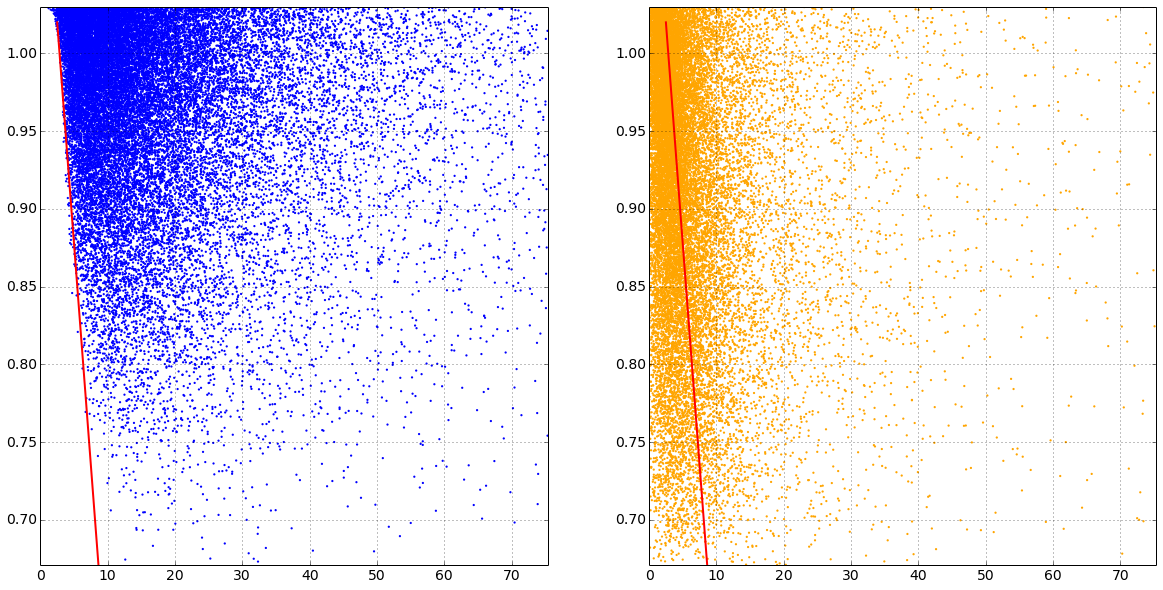

In [153]:
cutcol = ['i', 'q']
haz_cut, nohaz_cut = ld.cut_params(haz_gen_sg1b, nohaz_gen_sg1b, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[2.5, 1.02], [9.0, 0.65]]
vd.linearcut_plot(p1, p2, haz_cut, nohaz_cut)

In [154]:
sg1b_rot = al.linearcut_rotate(p1, p2, haz_cut, nohaz_cut)
p1rot, p2rot, haz_cutrot, nohaz_cutrot = sg1b_rot

In [155]:
# vd.linearcut_plot(p1rot, p2rot, haz_gen_sg1b_cutrot, nohaz_gen_sg1b_cutrot)

In [156]:
isplit = p1rot[0]
# print isplit

In [157]:
haz_right = np.where(haz_cutrot[:, 0] > isplit)[0]
nohaz_right = np.where(nohaz_cutrot[:, 0] > isplit)[0]

haz_left = np.where(haz_cutrot[:, 0] <= isplit)[0]
nohaz_left = np.where(nohaz_cutrot[:, 0] <= isplit)[0]

In [158]:
# print len(haz_gen_sg1b_roti)
# print len(nohaz_gen_sg1b_roti)

In [159]:
haz_gen_sg1bir = haz_gen_sg1b.iloc[haz_right]
nohaz_gen_sg1bir = nohaz_gen_sg1b.iloc[nohaz_right]

haz_gen_sg1d = haz_gen_sg1b.iloc[haz_left]
nohaz_gen_sg1d = nohaz_gen_sg1b.iloc[nohaz_left]

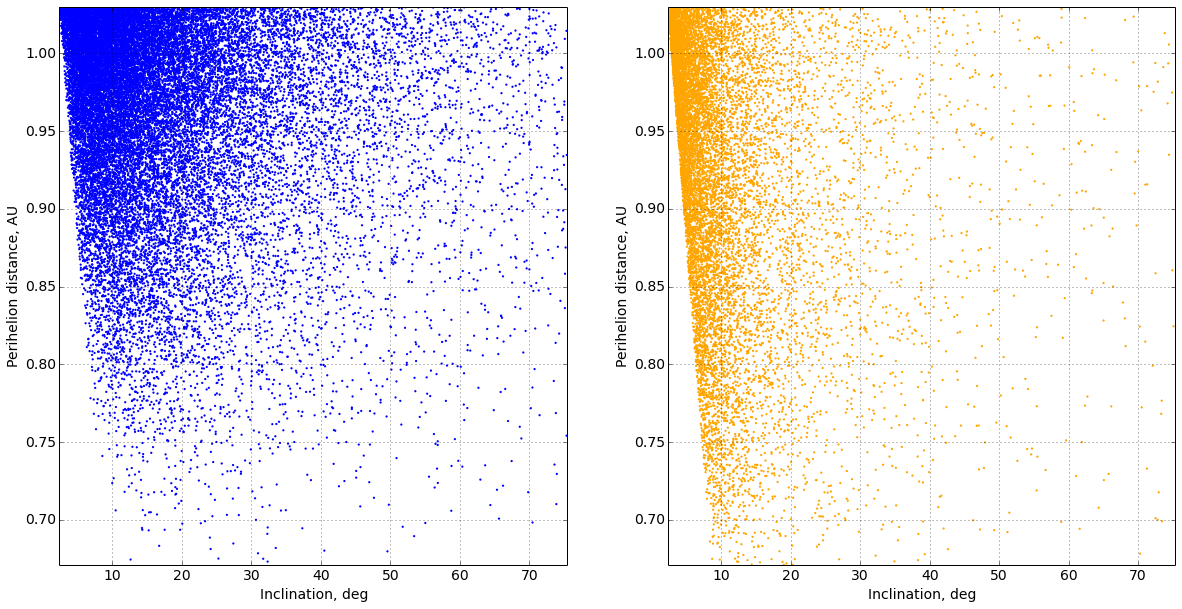

In [160]:
cutcol = ['i', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_sg1bir, nohaz_gen_sg1bir]) #invertaxes=[0,1]

In [161]:
# cutcol = ['a', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1b_right, nohaz_gen_sg1b_right]) #invertaxes=[0,1]

## Split by q-a plane

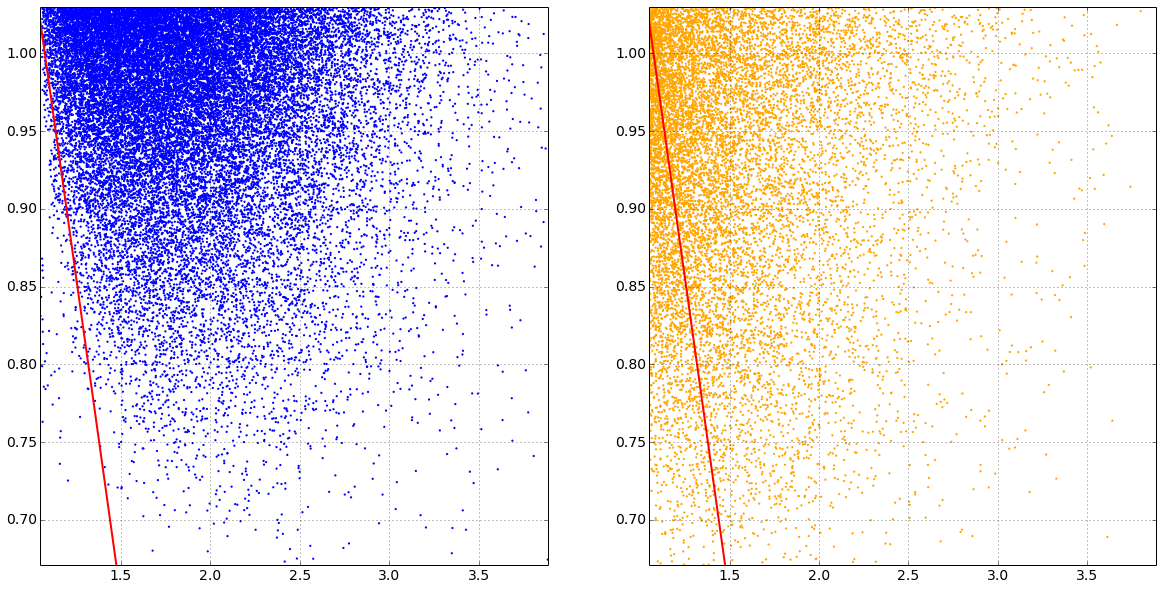

In [162]:
cutcol = ['a', 'q']
haz_cut, nohaz_cut = ld.cut_params(haz_gen_sg1bir, nohaz_gen_sg1bir, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[1.05, 1.02], [1.5, 0.65]]
vd.linearcut_plot(p1, p2, haz_cut, nohaz_cut)

In [163]:
sg1bir_rot = al.linearcut_rotate(p1, p2, haz_cut, nohaz_cut)
p1rot, p2rot, haz_cutrot, nohaz_cutrot = sg1bir_rot

In [164]:
asplit = p1rot[0]

In [165]:
haz_right = np.where(haz_cutrot[:, 0] > asplit)[0]
nohaz_right = np.where(nohaz_cutrot[:, 0] > asplit)[0]

haz_left = np.where(haz_cutrot[:, 0] <= asplit)[0]
nohaz_left = np.where(nohaz_cutrot[:, 0] <= asplit)[0]

In [166]:
print float(len(haz_right))/(len(nohaz_right) + len(haz_right))
print float(len(haz_left))/(len(nohaz_left) + len(haz_left))

0.263601089738
0.909362975631


In [167]:
haz_gen_sg1bar = haz_gen_sg1bir.iloc[haz_right]
nohaz_gen_sg1bar = nohaz_gen_sg1bir.iloc[nohaz_right]

haz_gen_sg1e = haz_gen_sg1bir.iloc[haz_left]
nohaz_gen_sg1e = nohaz_gen_sg1bir.iloc[nohaz_left]

In [168]:
# vd.display_allparams([haz_gen_sg1bar, nohaz_gen_sg1bar], vd.combs, vd.colnames)

## Extract w-q layer 

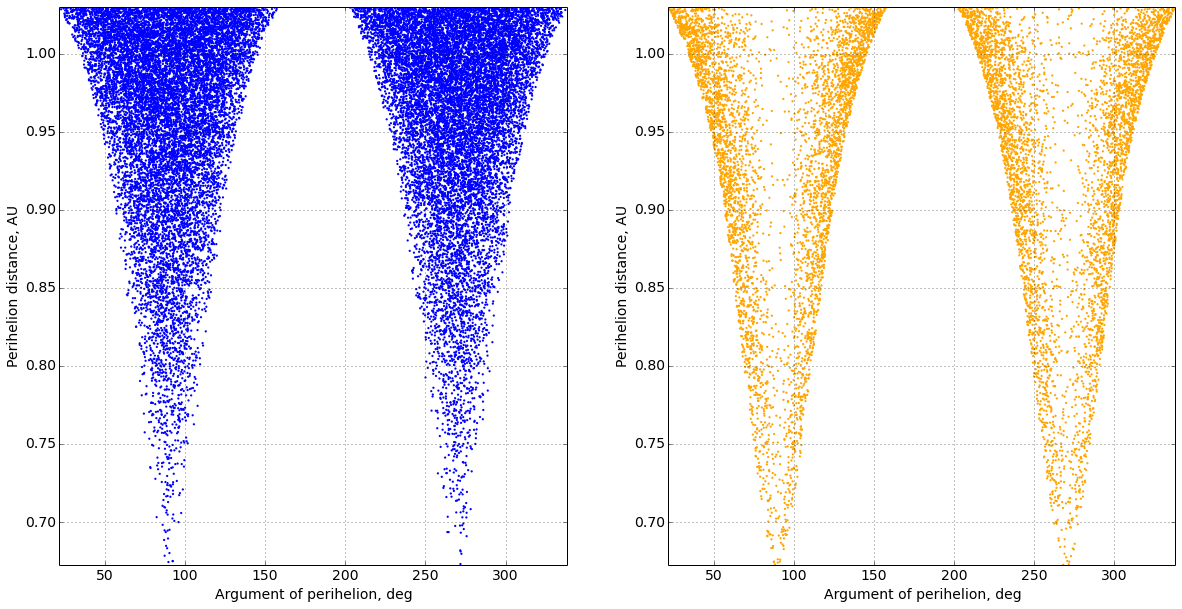

In [169]:
cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_sg1bar, nohaz_gen_sg1bar])

In [170]:
# cutcol = ['w', 'q']   # 'e', 'q', 'w', 'i' 90%
ncut = ld.ncut_params(haz_gen_sg1bar, nohaz_gen_sg1bar, cutcol)
haz_cut, nohaz_cut, scales = ncut

In [171]:
xtrain, ytrain = ld.mix_up(haz_cut, nohaz_cut)
# clf = neighbors.KNeighborsClassifier(n_neighbors=50) # weights='distance'
clf = svm.SVC(gamma=20., C=10.0, class_weight={1: 2.8}) # class_weight={1: 1.0} class_weight={1: 2.0}
clf = clf.fit(xtrain, ytrain)

In [172]:
haz_cls = clf.predict(haz_cut)
nohaz_cls= clf.predict(nohaz_cut)

In [173]:
haz_out = np.where(haz_cls == 1)[0]
nohaz_out = np.where(nohaz_cls == 1)[0]

In [174]:
haz_in = np.where(haz_cls == 0)[0]
nohaz_in = np.where(nohaz_cls == 0)[0]

In [175]:
haz_gen_sg1bout = haz_gen_sg1bar.iloc[haz_out]
nohaz_gen_sg1bout = nohaz_gen_sg1bar.iloc[nohaz_out]

In [176]:
haz_gen_sg1bin = haz_gen_sg1bar.iloc[haz_in]
nohaz_gen_sg1bin = nohaz_gen_sg1bar.iloc[nohaz_in]

In [177]:
print len(haz_gen_sg1bout)
print len(nohaz_gen_sg1bout)
print 1.0 - float(len(nohaz_gen_sg1bout))/(len(haz_gen_sg1bout) + len(nohaz_gen_sg1bout))
print
print len(haz_gen_sg1bin)
print len(nohaz_gen_sg1bin)
print float(len(nohaz_gen_sg1bin))/(len(haz_gen_sg1bin) + len(nohaz_gen_sg1bin))

7274
6280
0.536668142246

2305
20480
0.898836954136


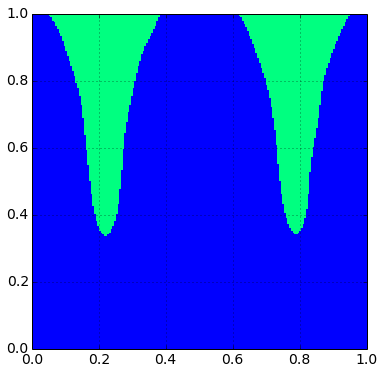

In [178]:
vd.plot_classifier(xtrain, clf, num=200, figsize=(6,6))

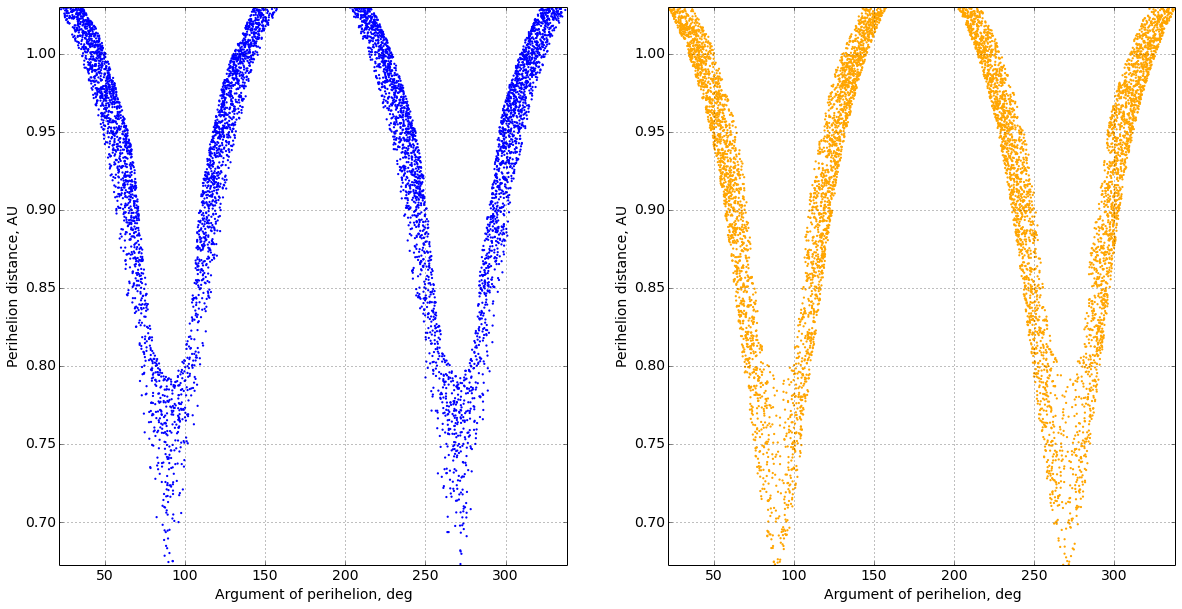

In [179]:
cutcol = ['w', 'q']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_sg1bout, nohaz_gen_sg1bout]) #invertaxes=[0,1]

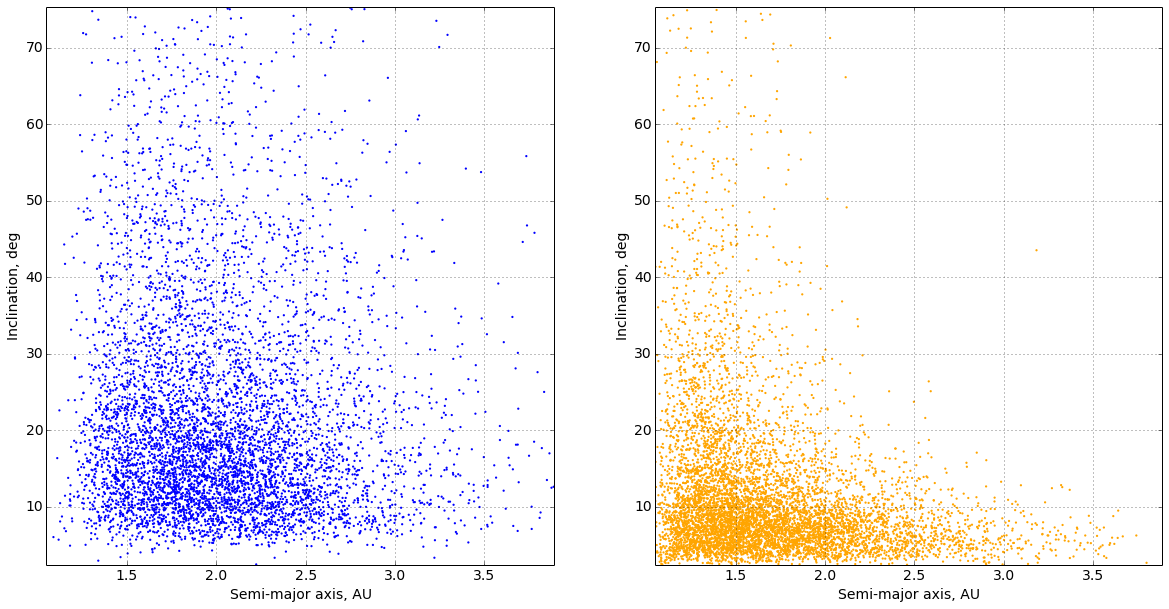

In [180]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_sg1bout, nohaz_gen_sg1bout]) #invertaxes=[0,1]

## Split outer layer by a-i 

In [181]:
# reload(ld)
haz_cut, nohaz_cut, scales = ld.ncut_params(haz_gen_sg1bout, nohaz_gen_sg1bout, cutcol)

In [182]:
xtrain, ytrain = ld.mix_up(haz_cut, nohaz_cut)
# clf = neighbors.KNeighborsClassifier(n_neighbors=50, class_weight={1: 10})
clf = svm.SVC(gamma=10., C=1.0, class_weight={0: 2.5}) #class_weight={0: 10}
clf = clf.fit(xtrain, ytrain)

In [183]:
haz_cls = clf.predict(haz_cut)
nohaz_cls= clf.predict(nohaz_cut)

In [184]:
haz_down = np.where(haz_cls == 1)[0]
nohaz_down = np.where(nohaz_cls == 1)[0]

haz_up = np.where(haz_cls == 0)[0]
nohaz_up = np.where(nohaz_cls == 0)[0]

In [185]:
haz_gen_sg1f = haz_gen_sg1bout.iloc[haz_down]
nohaz_gen_sg1f = nohaz_gen_sg1bout.iloc[nohaz_down]

haz_gen_sg1bup = haz_gen_sg1bout.iloc[haz_up]
nohaz_gen_sg1bup = nohaz_gen_sg1bout.iloc[nohaz_up]

In [186]:
print len(haz_gen_sg1f)
print len(nohaz_gen_sg1f)
print 1.0 - float(len(nohaz_gen_sg1f))/(len(haz_gen_sg1f) + len(nohaz_gen_sg1f))
print
print len(haz_gen_sg1bup)
print len(nohaz_gen_sg1bup)
print float(len(nohaz_gen_sg1bup))/(len(haz_gen_sg1bup) + len(nohaz_gen_sg1bup))

4516
538
0.893549663633

2758
5742
0.675529411765


In [187]:
# vd.display_allparams([haz_gen_sg1b_ee, nohaz_gen_sg1b_ee], vd.combs, vd.colnames)

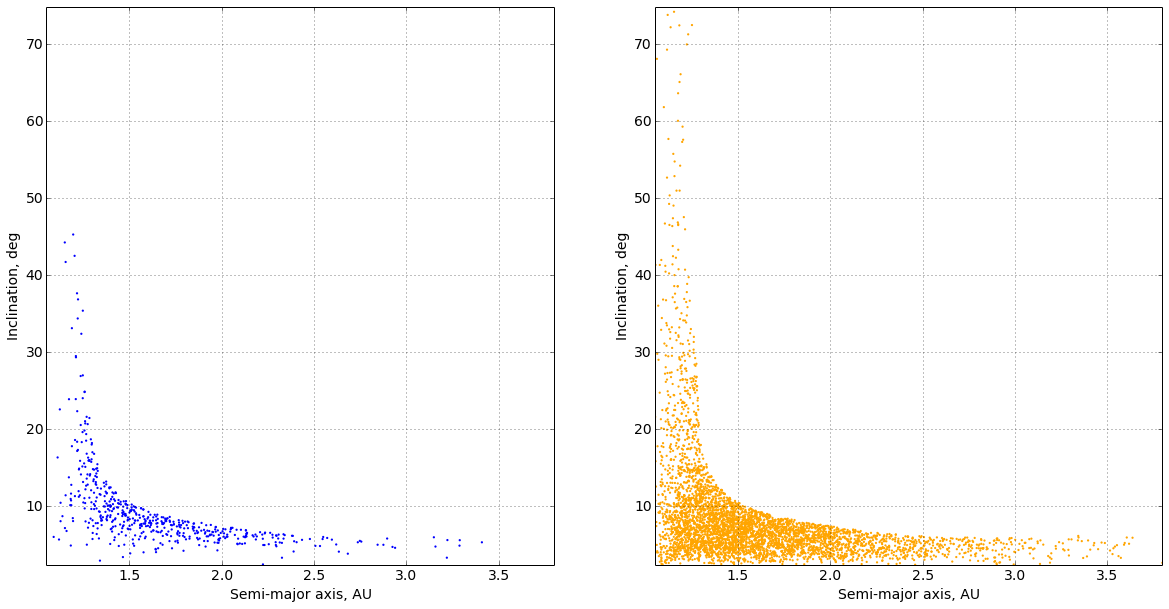

In [188]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_sg1f, nohaz_gen_sg1f]) #invertaxes=[0,1]

In [189]:
# df = clf.decision_function(haz_gen_sg1c_cut)
# print df

In [190]:
# df.shape
# print min(np.abs(df))
# print max(np.abs(df))

In [554]:
print float(len(haz_gen_sg1bin) + len(haz_gen_sg1bup) + len(haz_gen_sg1c)*0.5)/len(haz_gen) # len(haz_gen_sg1yy)

0.230599078341


In [66]:
# vd.display_param2d(cutcol, labels, [haz_gen_sg1c_extr, nohaz_gen_sg1c_extr])

In [67]:
# vd.display_allparams([haz_gen_sg1b_extr, nohaz_gen_sg1b_extr], vd.combs, vd.colnames)

In [68]:
# vd.display_allparams([haz_gen_sg1b_left, nohaz_gen_sg1b_left], vd.combs, vd.colnames)

In [69]:
# vd.display_allparams([haz_gen_sg1b_oo, nohaz_gen_sg1b_oo], vd.combs, vd.colnames)

In [553]:
# vd.display_allparams([haz_gen_sg1c, nohaz_gen_sg1c], vd.combs, vd.colnames)

In [71]:
# vd.display_allparams([haz_gen_sg1b_right, nohaz_gen_sg1b_right], vd.combs, vd.colnames)

In [552]:
# haz_gen_sg1ck = haz_gen_sg1c[haz_gen_sg1c.i < 8]
# nohaz_gen_sg1ck = nohaz_gen_sg1c[nohaz_gen_sg1c.i < 8]

In [551]:
# vd.display_allparams([haz_gen_sg1ck, nohaz_gen_sg1ck], vd.combs, vd.colnames)

## Mine sg1c

In [72]:
# vd.display_allparams([haz_gen_sg1c, nohaz_gen_sg1c], vd.combs, vd.colnames)

In [110]:
# vd.display_allparams([haz_gen_sg1c_sq, nohaz_gen_sg1c_sq], vd.combs, vd.colnames)

** Cut off nonhazardous clouds by w-i**

In [246]:
# haz_gen_sg1c_se = ld.add_mirror_column(haz_gen_sg1c_sq, 'w', 180.0)
# nohaz_gen_sg1c_se = ld.add_mirror_column(nohaz_gen_sg1c_sq, 'w', 180.0)

# haz_gen_sg1c_se = ld.add_doublemirror_column(haz_gen_sg1c_sq, 'w', 180.0)
# nohaz_gen_sg1c_se = ld.add_doublemirror_column(nohaz_gen_sg1c_sq, 'w', 180.0)

haz_gen_sg1c_se = ld.add_doublemirror_column(haz_gen_sg1c, 'w', 180.0)
nohaz_gen_sg1c_se = ld.add_doublemirror_column(nohaz_gen_sg1c, 'w', 180.0)

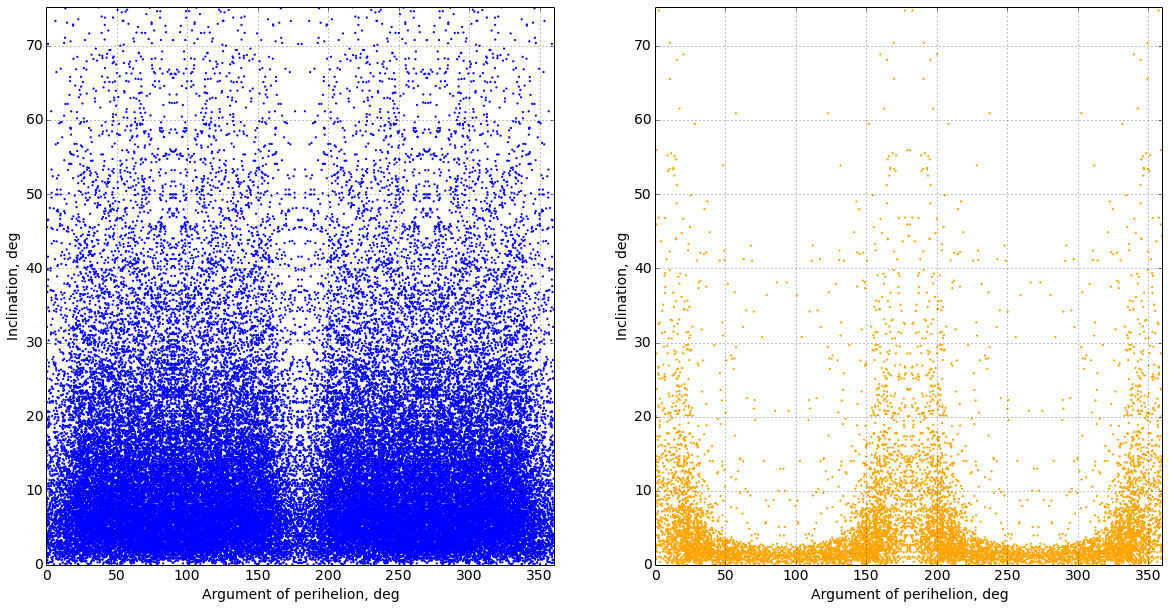

In [262]:
cutcol = ['w', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
vd.display_param2d(cutcol, labels, [haz_gen_sg1c_se, nohaz_gen_sg1c_se])

In [263]:
cutcol = ['w', 'i'] # ['i', 'q', 'w', 'om', 'a']
ncut = ld.ncut_params(haz_gen_sg1c_se, nohaz_gen_sg1c_se, cutcol)
haz_cut, nohaz_cut, scales = ncut

In [264]:
xtrain, ytrain = ld.mix_up(haz_cut, nohaz_cut)
# clf = neighbors.KNeighborsClassifier(n_neighbors=50) # weights='distance'
# clf = svm.SVC(gamma=10., C=1.0, class_weight={1: 5.0}) 
clf = svm.SVC(gamma=60., C=5.0, class_weight={1: 5.5}) # w-i U
# clf = svm.SVC(gamma=60., C=5.0, class_weight={0: 1.7}) # class_weight={1: 2.3}
# clf = tree.DecisionTreeClassifier(max_depth=2, class_weight={1: 2.0}) 
# clf = svm.LinearSVC(class_weight={1: 5.0})
# class_weight={1: 1.0} class_weight={1: 2.0} # , class_weight={0: 2.5}
clf = clf.fit(xtrain, ytrain)

In [265]:
ncut = ld.ncut_params(haz_gen_sg1c, nohaz_gen_sg1c, cutcol)
haz_cut, nohaz_cut, scales = ncut

In [266]:
haz_cls = clf.predict(haz_cut)
nohaz_cls= clf.predict(nohaz_cut)

In [267]:
haz_close = np.where(haz_cls == 1)[0]
nohaz_close = np.where(nohaz_cls == 1)[0]

haz_far = np.where(haz_cls == 0)[0]
nohaz_far = np.where(nohaz_cls == 0)[0]

In [268]:
haz_gen_sg1g = haz_gen_sg1c.iloc[haz_close]
nohaz_gen_sg1g = nohaz_gen_sg1c.iloc[nohaz_close]

haz_gen_sg1cfar = haz_gen_sg1c.iloc[haz_far]
nohaz_gen_sg1cfar = nohaz_gen_sg1c.iloc[nohaz_far]

In [269]:
print len(haz_gen_sg1g)
print len(nohaz_gen_sg1g)
print 1.0 - float(len(nohaz_gen_sg1g))/(len(haz_gen_sg1g) + len(nohaz_gen_sg1g))
print
print len(haz_gen_sg1cfar)
print len(nohaz_gen_sg1cfar)
print float(len(nohaz_gen_sg1cfar))/(len(haz_gen_sg1cfar) + len(nohaz_gen_sg1cfar))

2084
4380
0.322400990099

300
12082
0.975771280892


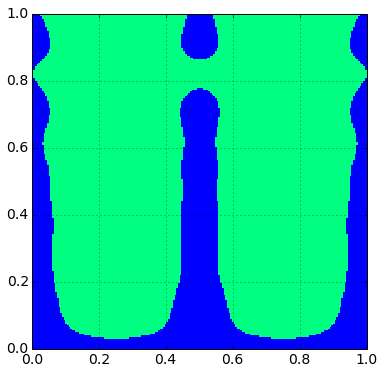

In [270]:
vd.plot_classifier(xtrain, clf, num=200, figsize=(6,6))

In [73]:
# vd.display_param2d(cutcol, labels, [haz_gen_sg1g, nohaz_gen_sg1g])

In [248]:
# vd.display_param2d(cutcol, labels, [haz_gen_sg1cfar, nohaz_gen_sg1cfar])

In [72]:
# vd.display_allparams([haz_gen_sg1g, nohaz_gen_sg1g], vd.combs, vd.colnames)

In [250]:
# haz_gen_sg1g_si = haz_gen_sg1g[haz_gen_sg1g['i'] > 5]
# nohaz_gen_sg1g_si = nohaz_gen_sg1g[nohaz_gen_sg1g['i'] > 5]

In [272]:
# vd.display_allparams([haz_gen_sg1g, nohaz_gen_sg1g], vd.combs, vd.colnames)

** Extract PHA belt by 3 parameters **

In [474]:
# haz_gen_sg1c_se = ld.add_mirror_column(haz_gen_sg1c_bq, 'w', 180.0)
# nohaz_gen_sg1c_se = ld.add_mirror_column(nohaz_gen_sg1c_bq, 'w', 180.0)

In [522]:
# haz_gen_sg1c_se = ld.add_doublemirror_column(haz_gen_sg1c, 'w', 180.0)
# nohaz_gen_sg1c_se = ld.add_doublemirror_column(nohaz_gen_sg1c, 'w', 180.0)

haz_gen_sg1c_se = ld.add_mirror_column(haz_gen_sg1g, 'w', 180.0)
nohaz_gen_sg1c_se = ld.add_mirror_column(nohaz_gen_sg1g, 'w', 180.0)

# haz_gen_sg1c_se = haz_gen_sg1g
# nohaz_gen_sg1c_se = nohaz_gen_sg1g

In [548]:
# cutcol = ['w', 'om']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1c_se, nohaz_gen_sg1c_se])

In [539]:
cutcol = ['w', 'om', 'q']
ncut = ld.ncut_params(haz_gen_sg1c_se, nohaz_gen_sg1c_se, cutcol)
haz_cut, nohaz_cut, scales = ncut

In [540]:
xtrain, ytrain = ld.mix_up(haz_cut, nohaz_cut)
# import sklearn.ensemble as sken
# clf = sken.AdaBoostClassifier()
# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()
# clf = neighbors.KNeighborsClassifier(n_neighbors=50) # weights='distance'
clf = svm.SVC(gamma=20., C=1, class_weight={0: 2.0})  # class_weight={0: 3.0} class_weight={0: 1.5}
# clf = svm.SVC(gamma=20., C=10.0, class_weight={1: 2.8})
# clf = tree.DecisionTreeClassifier(max_depth=20, class_weight={1: 2.0}) 
# clf = svm.LinearSVC(class_weight={1: 5.0})
# class_weight={1: 1.0} class_weight={1: 2.0} # , class_weight={0: 2.5}
clf = clf.fit(xtrain, ytrain)

In [541]:
ncut = ld.ncut_params(haz_gen_sg1g, nohaz_gen_sg1g, cutcol)
haz_cut, nohaz_cut, scales = ncut

In [542]:
haz_cls = clf.predict(haz_cut)
nohaz_cls= clf.predict(nohaz_cut)

In [543]:
haz_close = np.where(haz_cls == 1)[0]
nohaz_close = np.where(nohaz_cls == 1)[0]

haz_far = np.where(haz_cls == 0)[0]
nohaz_far = np.where(nohaz_cls == 0)[0]

In [544]:
haz_gen_sg1gg = haz_gen_sg1g.iloc[haz_close]
nohaz_gen_sg1gg = nohaz_gen_sg1g.iloc[nohaz_close]

haz_gen_sg1cf = haz_gen_sg1g.iloc[haz_far]
nohaz_gen_sg1cf = nohaz_gen_sg1g.iloc[nohaz_far]

In [545]:
print len(haz_gen_sg1gg)
print len(nohaz_gen_sg1gg)
print 1.0 - float(len(nohaz_gen_sg1gg))/(len(haz_gen_sg1gg) + len(nohaz_gen_sg1gg))
print
print len(haz_gen_sg1cf)
print len(nohaz_gen_sg1cf)
print float(len(nohaz_gen_sg1cf))/(len(haz_gen_sg1cf) + len(nohaz_gen_sg1cf))

1172
143
0.891254752852

912
4237
0.822878228782


In [546]:
# vd.plot_classifier(xtrain, clf, num=200, figsize=(6,6))

In [547]:
# vd.display_allparams([haz_gen_sg1gg, nohaz_gen_sg1gg], vd.combs, vd.colnames)

In [550]:
cutcol = ['i', 'q']
haz_cut, nohaz_cut = ld.cut_params(haz_gen_sg1c, nohaz_gen_sg1c, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_params(haz_gen, nohaz_gen, cutcol)
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen_sg1b, nohaz_gen_sg1b])
p1, p2 = [[0.0, 1.066], [3.0, 1.02]]
# vd.linearcut_plot(p1, p2, haz_cut, nohaz_cut)

In [76]:
sg1ci_rot = al.linearcut_rotate(p1, p2, haz_cut, nohaz_cut)
p1rot, p2rot, haz_cutrot, nohaz_cutrot = sg1ci_rot

In [77]:
isplit = p1rot[0]

In [78]:
haz_right = np.where(haz_cutrot[:, 0] > isplit)[0]
nohaz_right = np.where(nohaz_cutrot[:, 0] > isplit)[0]

haz_left = np.where(haz_cutrot[:, 0] <= isplit)[0]
nohaz_left = np.where(nohaz_cutrot[:, 0] <= isplit)[0]

In [79]:
print len(haz_left)
print len(nohaz_left)

print len(haz_right)
print len(nohaz_right)

1060
314
2488
19427


In [80]:
print float(len(haz_right))/(len(nohaz_right) + len(haz_right))
print float(len(haz_left))/(len(nohaz_left) + len(haz_left))

0.113529545973
0.771470160116


In [81]:
haz_gen_sg1yy = haz_gen_sg1c.iloc[haz_right]
nohaz_gen_sg1yy = nohaz_gen_sg1c.iloc[nohaz_right]

haz_gen_sg1cc = haz_gen_sg1c.iloc[haz_left]
nohaz_gen_sg1cc = nohaz_gen_sg1c.iloc[nohaz_left]

In [84]:
haz_gen_sg1cc_sq = haz_gen_sg1cc[haz_gen_sg1cc.q <= 1.035]
nohaz_gen_sg1cc_sq = nohaz_gen_sg1cc[nohaz_gen_sg1cc.q <= 1.035]

In [128]:
haz_gen_sg1yy_sq = haz_gen_sg1yy[haz_gen_sg1yy.q <= 1.035]
nohaz_gen_sg1yy_sq = nohaz_gen_sg1yy[nohaz_gen_sg1yy.q <= 1.035]

In [86]:
print len(haz_gen_sg1cc_sq)
print len(nohaz_gen_sg1cc_sq)
print float(len(haz_gen_sg1cc_sq))/(len(nohaz_gen_sg1cc_sq) + len(haz_gen_sg1cc_sq))

740
89
0.892641737033


In [549]:
# vd.display_allparams([haz_gen_sg1yy, nohaz_gen_sg1yy], vd.combs, vd.colnames)

In [87]:
haz_gen_sg1c_sq = haz_gen_sg1c[haz_gen_sg1c.q <= 1.035]
nohaz_gen_sg1c_sq = nohaz_gen_sg1c[nohaz_gen_sg1c.q <= 1.035]

In [88]:
# vd.display_allparams([haz_gen_sg1c_sq, nohaz_gen_sg1c_sq], vd.combs, vd.colnames)

In [89]:
haz_gen_sg1c_bq = haz_gen_sg1c[haz_gen_sg1c.q > 1.035]
nohaz_gen_sg1c_bq = nohaz_gen_sg1c[nohaz_gen_sg1c.q > 1.035]

In [530]:
# vd.display_allparams([haz_gen_sg1c_bq, nohaz_gen_sg1c_bq], vd.combs, vd.colnames)

** Leftovers **

In [84]:
# cutcol = ['w', 'q', 'i']
# haz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_cut = ld.cut_params(haz_gen_sg1c_left, nohaz_gen_sg1c_left, cutcol)
# bounds = al.common_bounds([haz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_cut])
# haz_gen_sg1c_left_cut, haz_gen_sg1c_left_sc = al.normalize_dataset(haz_gen_sg1c_left_cut, bounds=bounds)
# nohaz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_sc = al.normalize_dataset(nohaz_gen_sg1c_left_cut, bounds=bounds)

In [85]:
# xtrain, ytrain = ld.mix_up(haz_gen_sg1c_left_cut, nohaz_gen_sg1c_left_cut)
# clf = neighbors.KNeighborsClassifier(n_neighbors=100)
# clf = svm.SVC(gamma=80., C=1.0)
# clf = clf.fit(xtrain, ytrain)

In [86]:
# haz_cls = clf.predict(haz_gen_sg1c_left_cut)
# nohaz_cls = clf.predict(nohaz_gen_sg1c_left_cut)

In [87]:
# haz_extr_inds = np.where(haz_cls == 1)[0]
# nohaz_extr_inds = np.where(nohaz_cls == 1)[0]

In [88]:
# haz_left_inds = np.where(haz_cls == 0)[0]
# nohaz_left_inds = np.where(nohaz_cls == 0)[0]

In [89]:
# haz_gen_sg1c_leftE = haz_gen_sg1c_left.iloc[haz_extr_inds]
# nohaz_gen_sg1c_leftE = nohaz_gen_sg1c_left.iloc[nohaz_extr_inds]

In [90]:
# haz_gen_sg1c_leftL = haz_gen_sg1c_left.iloc[haz_left_inds]
# nohaz_gen_sg1c_leftL = nohaz_gen_sg1c_left.iloc[nohaz_left_inds]

In [91]:
# print 1.0 - float(len(nohaz_gen_sg1c_leftE))/(len(haz_gen_sg1c_leftE) + len(nohaz_gen_sg1c_leftE))

In [92]:
# print len(haz_gen_sg1c_leftE)
# print len(nohaz_gen_sg1c_leftE)

In [93]:
# print len(haz_gen_sg1c_leftL)
# print len(nohaz_gen_sg1c_leftL)

In [94]:
# print 1.0 - float(len(nohaz_gen_sg1c_leftL))/(len(haz_gen_sg1c_leftL) + len(nohaz_gen_sg1c_leftL))

## Apply simple cut by tree by semi-major axis and inclination

In [268]:
# # haz_train_cut, nohaz_train_cut = ld.prepare_data(cutcol=['a', 'i'], datasets=[haz_gen, nohaz_gen])
# # xtrain, ytrain, xtest, ytest = ld.get_learndata([haz_train_cut, nohaz_train_cut, haz_test_cut, nohaz_test_cut])

# # reload(ld)
# cutcol = ['a', 'i']
# xtrain, ytrain = ld.learning_sets(haz_gen, nohaz_gen, cutcol)
# clf = tree.DecisionTreeClassifier(max_depth=2) 
# clf = clf.fit(xtrain, ytrain)

In [267]:
# # reload(vd)
# # haz_gen_cut, nohaz_gen_cut = ld.prepare_data(cutcol=cutcol, datasets=[haz_gen, nohaz_gen])
# haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen, nohaz_gen])
# labels = [vd.colnames['a'], vd.colnames['i']]
# # vd.plot_classifier(xtrain, clf,  cmap='ocean_r', labels=labels, rescale=False)
# vd.plot_classifier(xtrain, clf, cmap='ocean_r', haz=haz_gen_cut, nohaz=nohaz_gen_cut, 
#                    labels=labels, rescale=False, figsize=(8,8))

In [266]:
# al.fit_predict(xtrain, ytrain, xtrain, ytrain, clf)

In [265]:
# haz_predicted = clf.predict(haz_gen_cut)
# nohaz_predicted = clf.predict(nohaz_gen_cut)

# haz_num = len(np.where(haz_predicted == 1)[0])
# nohaz_num = len(np.where(nohaz_predicted == 1)[0])
# purity = float(haz_num)/(haz_num + nohaz_num)
# print purity

## Split subgroup into 2 minigroups by the density of nonhazardous asteroids

In [9]:
# cutcol = ['a', 'i']
# labels = [vd.colnames['a'], vd.colnames['i']]
# vd.display_param2d(cutcol, labels, [haz_gen, nohaz_gen]) #invertaxes=[0,1]

In [15]:
# print len(haz_gen_sg1c_left)
# print len(nohaz_gen_sg1c_left)
# print len(haz_gen_sg1c_left)*100/1e5
# print float(len(nohaz_gen_sg1c_left))/(len(nohaz_gen_sg1c_left)+len(haz_gen_sg1c_left))

In [242]:
# vd.display_allparams([haz_gen_sg1b_right, nohaz_gen_sg1b_right], vd.combs, vd.colnames)

** Cut w and q **

In [557]:
# cutcol = ['w', 'q']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1b_right, nohaz_gen_sg1b_right]) #invertaxes=[0,1]

In [91]:
# cutcol = ['q', 'i']
# labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1b, nohaz_gen_sg1b], invertaxes=[0,1])

** Normalize datasets **

In [243]:
haz_gen_sg1x_se_cut, nohaz_gen_sg1x_se_cut = ld.cut_params(haz_gen_sg1x_se, nohaz_gen_sg1x_se, cutcol)
# haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_2params(cutcol, [haz_gen_sg1b_se, nohaz_gen_sg1b_se])
bounds = al.common_bounds([haz_gen_sg1x_se_cut, nohaz_gen_sg1x_se_cut])
haz_gen_sg1x_se_cut, haz_gen_sg1x_se_sc = al.normalize_dataset(haz_gen_sg1x_se_cut, bounds=bounds)
nohaz_gen_sg1x_se_cut, nohaz_gen_sg1x_se_sc = al.normalize_dataset(nohaz_gen_sg1x_se_cut, bounds=bounds)

In [244]:
# haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_params(haz_gen_sg1b_se, nohaz_gen_sg1b_se, cutcol)
# # haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_2params(cutcol, [haz_gen_sg1b_se, nohaz_gen_sg1b_se])
# # bounds = al.common_bounds([haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut])
# haz_gen_sg1b_se_cut, haz_gen_sg1b_se_sc = al.normalize_dataset(haz_gen_sg1b_se_cut, bounds=bounds)
# nohaz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_sc = al.normalize_dataset(nohaz_gen_sg1b_se_cut, bounds=bounds)

In [245]:
haz_gen_sg1b_cut, nohaz_gen_sg1b_cut = ld.cut_params(haz_gen_sg1b_right, nohaz_gen_sg1b_right, cutcol)
# haz_gen_sg1b_se_cut, nohaz_gen_sg1b_se_cut = ld.cut_2params(cutcol, [haz_gen_sg1b_se, nohaz_gen_sg1b_se])
# bounds = al.common_bounds([haz_gen_sg1b_cut, nohaz_gen_sg1b_cut])
haz_gen_sg1b_cut, haz_gen_sg1b_sc = al.normalize_dataset(haz_gen_sg1b_cut, bounds=bounds)
nohaz_gen_sg1b_cut, nohaz_gen_sg1b_sc = al.normalize_dataset(nohaz_gen_sg1b_cut, bounds=bounds)

In [96]:
# # haz_gen_cut, nohaz_gen_cut = ld.cut_2params(cutcol, [haz_gen, nohaz_gen])
# # haz_gen_cutn, haz_sc = al.normalize_dataset(haz_gen_cut)
# # nohaz_gen_cutn, nohaz_sc = al.normalize_dataset(nohaz_gen_cut)


# # haz_gen_sg1c_cut, nohaz_gen_sg1c_cut = ld.cut_params(haz_gen_sg1c_left, nohaz_gen_sg1c_left, cutcol)
# haz_gen_sg1c_cut, nohaz_gen_sg1c_cut = ld.cut_2params(cutcol, [haz_gen_sg1c_left, nohaz_gen_sg1c_left])
# # haz_gen_sg1c_cut, nohaz_gen_sg1c_cut = ld.cut_params(haz_gen_sg1c, nohaz_gen_sg1c, cutcol)
# # bounds = al.common_bounds([haz_gen_sg1c_cut, nohaz_gen_sg1c_cut])
# haz_gen_sg1c_cut, haz_gen_sg1c_sc = al.normalize_dataset(haz_gen_sg1c_cut, bounds=bounds)
# nohaz_gen_sg1c_cut, nohaz_gen_sg1c_sc = al.normalize_dataset(nohaz_gen_sg1c_cut, bounds=bounds)

** Find common scale **

In [51]:
# xsc = np.asarray([list(ss[0]) for ss in [haz_sc, nohaz_sc]]).ravel()
# ysc = np.asarray([list(ss[1]) for ss in [haz_sc, nohaz_sc]]).ravel()
# scales = [(xsc.min(), xsc.max()), (ysc.min(), ysc.max())]

# scales = ld.common_scales([haz_gen_sg1b_sc, nohaz_gen_sg1b_sc])
# scales = ld.common_scales([haz_gen_sg1c_sc, nohaz_gen_sg1c_sc])

** Extend nonhazardous dataset with narrow bands on the top to get better KDE fit **

In [215]:
# def gen_strips(amounts, bounds):
#     strips = []
#     for a, b in zip(amounts, bounds):
#         h, v = a
#         right, left, bottom, top = b
        
#         hrand = np.array([np.random.uniform(low=left, high=right, size=v) for i in range(h)])
#         vrand = np.array([np.random.uniform(low=bottom, high=top, size=h) for i in range(v)]).T
        
#         hrand_ = hrand.ravel().T
#         vrand_ = vrand.ravel().T
        
#         rand_strip = np.concatenate((hrand_, vrand_)).reshape(2, len(vrand_)).T
#         strips.append(rand_strip)
#     return strips

In [216]:
# am1 = [250, 7]
# sb1 = [-0.02, 0.42, 0.99, 1.04]
# sb2 = [0.58,  1.02, 0.99, 1.04]
# sb3 = [0.04,  0.36, 0.99, 1.04]
# sb4 = [0.64,  0.96, 0.99, 1.04]

# am2 = [250, 7]
# sb5 = [-0.04, 0.44, 1.04, 1.09]
# sb6 = [0.56,  1.04, 1.04, 1.09]
# sb7 = [0.02,  0.38, 1.04, 1.09]
# sb8 = [0.62,  0.98, 1.04, 1.09]

# am3 = [200, 10]
# sb9 = [-0.02, 0.42, 1.09, 1.2]
# sb10 = [0.58, 1.02, 1.09, 1.2]
# sb11 = [0.04, 0.36, 1.09, 1.2]
# sb12 = [0.64, 0.96, 1.09, 1.2]

# # strips = gen_strips([am12, am12], [sb1, sb2])
# # strips = gen_strips([am34, am34], [sb3, sb4])
# # strips = gen_strips([am12, am12, am34, am34], [sb1, sb2, sb3, sb4])
# # strips = gen_strips([am56, am56], [sb5, sb6])
# # strips = gen_strips([am78, am78], [sb7, sb8])
# strips = gen_strips([am1, am1, am1, am1, am2, am2, am2, am2, am3, am3, am3, am3], 
#                     [sb1, sb2, sb3, sb4, sb5, sb6, sb7, sb8, sb9, sb10, sb11, sb12])

In [217]:
# extended = [nohaz_gen_cutn] + strips
# nohaz_gen_cutn_ = np.concatenate(tuple(extended))

In [218]:
# labels_norm = [vd.colnames_norm['w'], vd.colnames_norm['q']]
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
# ax.scatter(nohaz_gen_cutn_[..., 0], nohaz_gen_cutn_[..., 1], s=1, lw=0)
# ax.set_xlabel(labels_norm[0])
# ax.set_ylabel(labels_norm[1])
# ax.grid(True)
# ax.invert_yaxis()
# plt.show()

** Fit Kernel Density model based on density distribution for nonhazardous dataset **

In [233]:
kde = KernelDensity(kernel='linear', bandwidth=0.06).fit(nohaz_gen_sg1x_se_cut)
# kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(nohaz_gen_cutn_)
# reload(al)
levels, xyz = al.normgrid_kde(kde, levnum=4) # scales=scales

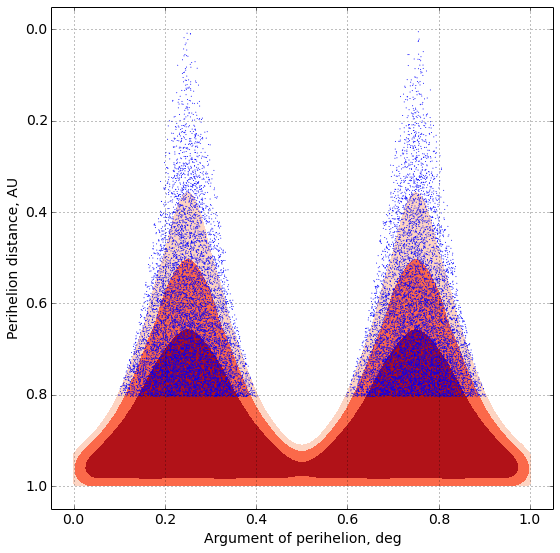

In [234]:
x, y, z = xyz
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.contourf(x, y, z, levels=levels, cmap=plt.cm.Reds)
ax.scatter(nohaz_gen_sg1b_cut[..., 0], nohaz_gen_sg1b_cut[..., 1], s=1, lw=0)
ax.grid(True)
# ax.set_xlim(scales[0])
# ax.set_ylim(scales[1])
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.invert_yaxis()
plt.show()
# reload(vd)
# vd.plot_kde(kde, levnum=4, figsize=(10,10), scales=scales)

In [235]:
# Zhaz = kde.score_samples(haz_gen_sg1c_cut)
# Znohaz = kde.score_samples(nohaz_gen_sg1c_cut)

Zhaz = kde.score_samples(haz_gen_sg1b_cut)
Znohaz = kde.score_samples(nohaz_gen_sg1b_cut)

** Split datasets by density clusters **

In [236]:
mingi_haz = al.split_minigroups(Zhaz, levels)
mingi_nohaz = al.split_minigroups(Znohaz, levels)

In [237]:
# print mingi_haz[-4]

In [246]:
haz_mg11_inds = mingi_haz[-1]
nohaz_mg11_inds = mingi_nohaz[-1]
haz_gen_mg11 = haz_gen_sg1b_right.iloc[haz_mg11_inds]
nohaz_gen_mg11 = nohaz_gen_sg1b_right.iloc[nohaz_mg11_inds]

haz_mg12_inds = mingi_haz[-2]
nohaz_mg12_inds = mingi_nohaz[-2]
haz_gen_mg12 = haz_gen_sg1b_right.iloc[haz_mg12_inds]
nohaz_gen_mg12 = nohaz_gen_sg1b_right.iloc[nohaz_mg12_inds]

haz_mg13_inds = mingi_haz[-3]
nohaz_mg13_inds = mingi_nohaz[-3]
haz_gen_mg13 = haz_gen_sg1b_right.iloc[haz_mg13_inds]
nohaz_gen_mg13 = nohaz_gen_sg1b_right.iloc[nohaz_mg13_inds]

# haz_mg14_inds = mingi_haz[-4]
# nohaz_mg14_inds = mingi_nohaz[-4]
# haz_gen_mg14 = haz_gen_sg1c.iloc[haz_mg14_inds]
# nohaz_gen_mg14 = nohaz_gen_sg1c.iloc[nohaz_mg14_inds]

haz_rest_inds = list(set(range(len(haz_gen_sg1b_right))) - set(haz_mg11_inds + haz_mg12_inds + haz_mg13_inds))
nohaz_rest_inds = list(set(range(len(nohaz_gen_sg1b_right))) - set(nohaz_mg11_inds + nohaz_mg12_inds + nohaz_mg13_inds))

haz_gen_mg14 = haz_gen_sg1b_right.iloc[haz_rest_inds]
nohaz_gen_mg14 = nohaz_gen_sg1b_right.iloc[nohaz_rest_inds]

In [247]:
def split_minigroup(haz_mg, nohaz_mg, clf, cutcol):
    
    haz_cut, nohaz_cut = ld.cut_2params(cutcol, [haz_mg, nohaz_mg])
    
    haz_predicted = clf.predict(haz_cut)
    nohaz_predicted = clf.predict(nohaz_cut)
    
    haz_extr_inds = np.where(haz_predicted == 1)[0]
    haz_rest_inds = np.where(haz_predicted == 0)[0]

    nohaz_extr_inds = np.where(nohaz_predicted == 1)[0]
    nohaz_rest_inds = np.where(nohaz_predicted == 0)[0]
    
    haz_num = len(haz_extr_inds)
    nohaz_num = len(nohaz_extr_inds)
    purity = float(haz_num)/(haz_num + nohaz_num)
    print "purity:", purity
    
    haz_mg_extr = haz_mg.iloc[haz_extr_inds]
    nohaz_mg_extr = nohaz_mg.iloc[nohaz_extr_inds]
    
    haz_mg_rest = haz_mg.iloc[haz_rest_inds]
    nohaz_mg_rest = nohaz_mg.iloc[nohaz_rest_inds]
    
    return haz_mg_extr, nohaz_mg_extr, haz_mg_rest, nohaz_mg_rest
  

## Mine minigroup 1.1

In [298]:
# vd.display_allparams([haz_gen_mg11, nohaz_gen_mg11], vd.combs, vd.colnames)

In [127]:
# haz_gen_mg11, nohaz_gen_mg11 = haz_gen_sg1c_extr, nohaz_gen_sg1c_extr
# haz_gen_mg11, nohaz_gen_mg11 = haz_gen_sg1c_left, nohaz_gen_sg1c_left

In [556]:
cutcol = ['a', 'i']
labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1c, nohaz_gen_sg1c], invertaxes=[0,1]) #invertaxes=[0,1]
# vd.display_param2d(cutcol, labels, [haz_gen_mg11, nohaz_gen_mg11], invertaxes=[0,1]) #invertaxes=[0,1]

** Apply simple cut **

In [74]:
# float(len(haz_gen_mg11))/(len(nohaz_gen_mg11) + len(haz_gen_mg11))

In [250]:
cutcol = ['a', 'i']
xtrain_mg11, ytrain_mg11 = ld.learning_sets(haz_gen_mg11, nohaz_gen_mg11, cutcol)
clf11 = tree.DecisionTreeClassifier(max_depth=2) 
clf11 = clf11.fit(xtrain_mg11, ytrain_mg11)

learn_data.py:217: UserWarning: this function is deprecated. use cut_params instead
  warnings.warn("this function is deprecated. use cut_params instead")


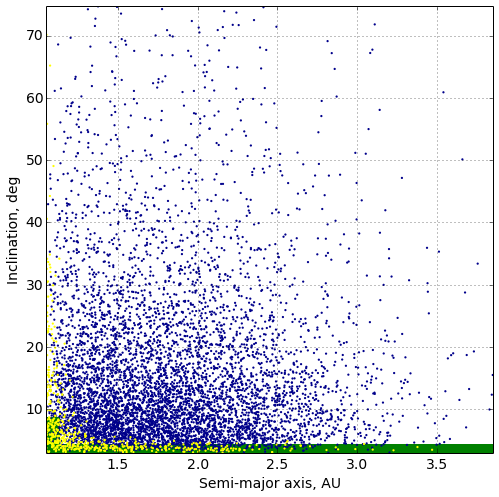

In [251]:
cutcol = ['a', 'i']
haz_gen_mg11_cut, nohaz_gen_mg11_cut = ld.cut_2params(cutcol, [haz_gen_mg11, nohaz_gen_mg11])
labels = [vd.colnames[nm] for nm in cutcol]
vd.plot_classifier(xtrain_mg11, clf11, haz=haz_gen_mg11_cut, nohaz=nohaz_gen_mg11_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

** Analyse prediction score **

In [252]:
al.fit_predict(xtrain_mg11, ytrain_mg11, xtrain_mg11, ytrain_mg11, clf11)

score: 0.932556801841
predict_haz_fraction: 0.0798101811907
true_haz_fraction: 0.0851308599367


** Analyse split quality for minigroup 1.1**

In [253]:
extract11 = split_minigroup(haz_gen_mg11, nohaz_gen_mg11, clf11, cutcol)
haz_gen_mg11_extr, nohaz_gen_mg11_extr, haz_gen_mg11_rest, nohaz_gen_mg11_rest = extract11

purity: 0.610810810811


In [254]:
float(len(haz_gen_mg11_extr))/(len(nohaz_gen_mg11_extr) + len(haz_gen_mg11_extr))

0.6108108108108108

## Mine minigroup 1.2

In [289]:
# vd.display_allparams([haz_gen_mg12, nohaz_gen_mg12], vd.combs, vd.colnames)

In [257]:
# haz_gen_mg12, nohaz_gen_mg12 = haz_gen_sg1c_extr, nohaz_gen_sg1c_extr

In [555]:
cutcol = ['e', 'i']
# labels = [vd.colnames['a'], vd.colnames['i']]
labels = [vd.colnames[nm] for nm in cutcol]
# vd.display_param2d(cutcol, labels, [haz_gen_sg1c_extr, nohaz_gen_sg1c_extr], invertaxes=[0,1]) #invertaxes=[0,1]
# vd.display_param2d(cutcol, labels, [haz_gen_mg12, nohaz_gen_mg12], invertaxes=[0,1]) #invertaxes=[0,1]

** Apply simple cut **

In [264]:
cutcol = ['e', 'i']
xtrain_mg12, ytrain_mg12 = ld.learning_sets(haz_gen_mg12, nohaz_gen_mg12, cutcol)
clf12 = tree.DecisionTreeClassifier(max_depth=2) 
clf12 = clf12.fit(xtrain_mg12, ytrain_mg12)

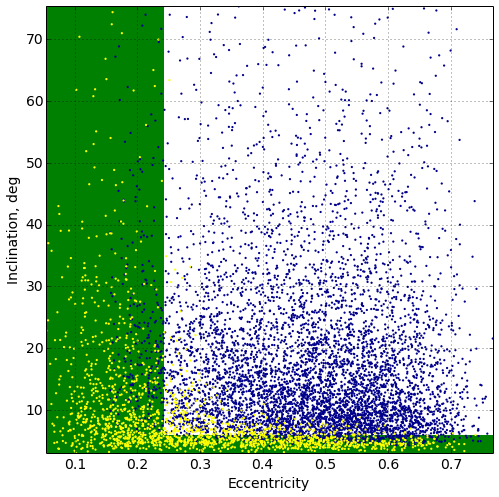

In [265]:
haz_gen_mg12_cut, nohaz_gen_mg12_cut = ld.cut_2params(cutcol, [haz_gen_mg12, nohaz_gen_mg12])
# labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg12, clf12, haz=haz_gen_mg12_cut, nohaz=nohaz_gen_mg12_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

**Analyse prediction score**

In [266]:
al.fit_predict(xtrain_mg12, ytrain_mg12, xtrain_mg12, ytrain_mg12, clf12)

score: 0.885807915301
predict_haz_fraction: 0.248550541971
true_haz_fraction: 0.229644567683


** Analyze split quality for minigroup 1.2**

In [267]:
extract12 = split_minigroup(haz_gen_mg12, nohaz_gen_mg12, clf12, cutcol)
haz_gen_mg12_extr, nohaz_gen_mg12_extr, haz_gen_mg12_rest, nohaz_gen_mg12_rest = extract12

purity: 0.732251521298


## Mine minigroup 1.3

In [290]:
# vd.display_allparams([haz_gen_mg13, nohaz_gen_mg13], vd.combs, vd.colnames)

** Apply simple cut **

In [273]:
cutcol = ['e', 'i']
xtrain_mg13, ytrain_mg13 = ld.learning_sets(haz_gen_mg13, nohaz_gen_mg13, cutcol)
clf13 = tree.DecisionTreeClassifier(max_depth=2) 
clf13 = clf13.fit(xtrain_mg13, ytrain_mg13)

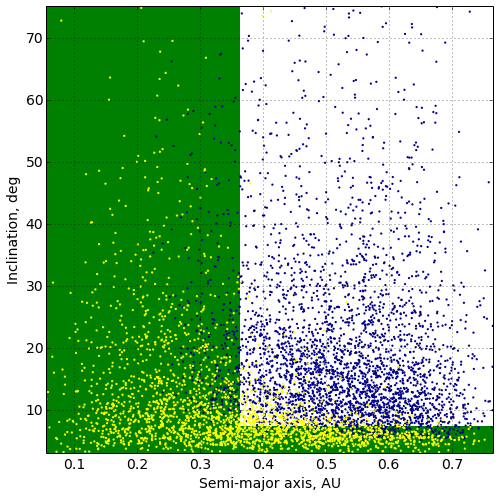

In [274]:
haz_gen_mg13_cut, nohaz_gen_mg13_cut = ld.cut_2params(cutcol, [haz_gen_mg13, nohaz_gen_mg13])
labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg13, clf13, haz=haz_gen_mg13_cut, nohaz=nohaz_gen_mg13_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

**Analyse prediction score**

In [275]:
al.fit_predict(xtrain_mg13, ytrain_mg13, xtrain_mg13, ytrain_mg13, clf13)

score: 0.861441686501
predict_haz_fraction: 0.436416184971
true_haz_fraction: 0.410404624277


** Analyze split quality for minigroup 1.3**

In [276]:
extract13 = split_minigroup(haz_gen_mg13, nohaz_gen_mg13, clf13, cutcol)
haz_gen_mg13_extr, nohaz_gen_mg13_extr, haz_gen_mg13_rest, nohaz_gen_mg13_rest = extract13

purity: 0.811453058044


## Mine minigroup 1.4

In [291]:
# vd.display_allparams([haz_gen_mg14, nohaz_gen_mg14], vd.combs, vd.colnames)

In [278]:
cutcol = ['a', 'i']
xtrain_mg14, ytrain_mg14 = ld.learning_sets(haz_gen_mg14, nohaz_gen_mg14, cutcol)
clf14 = tree.DecisionTreeClassifier(max_depth=2) 
clf14 = clf14.fit(xtrain_mg14, ytrain_mg14)

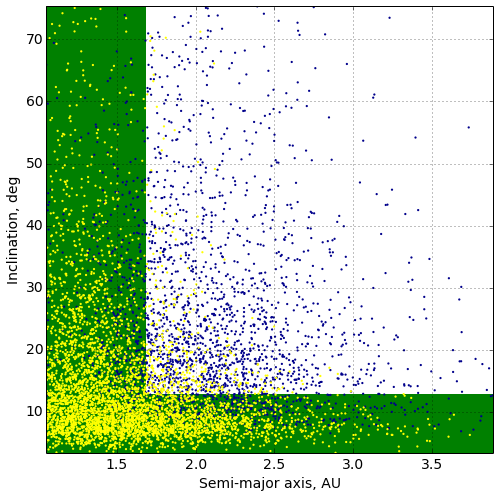

In [279]:
haz_gen_mg14_cut, nohaz_gen_mg14_cut = ld.cut_2params(cutcol, [haz_gen_mg14, nohaz_gen_mg14])
labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg14, clf14, haz=haz_gen_mg14_cut, nohaz=nohaz_gen_mg14_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

In [280]:
al.fit_predict(xtrain_mg14, ytrain_mg14, xtrain_mg14, ytrain_mg14, clf14)

score: 0.830758122744
predict_haz_fraction: 0.705559566787
true_haz_fraction: 0.655884476534


In [281]:
extract14 = split_minigroup(haz_gen_mg14, nohaz_gen_mg14, clf14, cutcol)
haz_gen_mg14_extr, nohaz_gen_mg14_extr, haz_gen_mg14_rest, nohaz_gen_mg14_rest = extract14

purity: 0.844862873516


In [51]:
# vd.display_allparams([haz_genu_sg1d, nohaz_genu_sg1d], vd.combs, vd.colnames)

In [369]:
# haz_gen_mg15 = pd.concat((haz_gen_mg12, haz_gen_mg13, haz_gen_mg14)) 
# nohaz_gen_mg15 = pd.concat((haz_gen_mg12, nohaz_gen_mg13, nohaz_gen_mg14)) 

haz_gen_mg15 = haz_gen_sg1b_extr
nohaz_gen_mg15 = nohaz_gen_sg1b_extr

In [370]:
# vd.display_allparams([haz_gen_mg15, nohaz_gen_mg15], vd.combs, vd.colnames)

In [371]:
cutcol = ['a', 'i']
xtrain_mg15, ytrain_mg15 = ld.learning_sets(haz_gen_mg15, nohaz_gen_mg15, cutcol)
clf15 = tree.DecisionTreeClassifier(max_depth=2)

clf15 = clf15.fit(xtrain_mg15, ytrain_mg15)

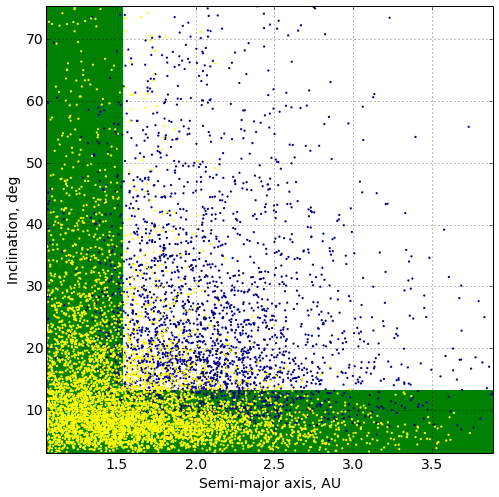

In [372]:
haz_gen_mg15_cut, nohaz_gen_mg15_cut = ld.cut_2params(cutcol, [haz_gen_mg15, nohaz_gen_mg15])
labels = [vd.colnames['a'], vd.colnames['i']]
vd.plot_classifier(xtrain_mg15, clf15, haz=haz_gen_mg15_cut, nohaz=nohaz_gen_mg15_cut, cmap='ocean_r', 
                   labels=labels, invertaxes=[0,0], rescale=False, figsize=(8,8))

In [373]:
al.fit_predict(xtrain_mg15, ytrain_mg15, xtrain_mg15, ytrain_mg15, clf15)

score: 0.838833372066
predict_haz_fraction: 0.673135022078
true_haz_fraction: 0.660237043923


In [374]:
extract15 = split_minigroup(haz_gen_mg15, nohaz_gen_mg15, clf15, cutcol)
haz_gen_mg15_extr, nohaz_gen_mg15_extr, haz_gen_mg15_rest, nohaz_gen_mg15_rest = extract15

purity: 0.870706024512


## Export minigroups

In [373]:
haz_mg_db = [haz_gen_mg11, haz_gen_mg12, haz_gen_mg13]
nohaz_mg_db = [nohaz_gen_mg11, nohaz_gen_mg12, nohaz_gen_mg13]

haz_mg_extr_db = [haz_gen_mg11_extr, haz_gen_mg12_extr, haz_gen_mg13_extr]
nohaz_mg_extr_db = [nohaz_gen_mg11_extr, nohaz_gen_mg12_extr, nohaz_gen_mg13_extr]

haz_mg_rest_db = [haz_gen_mg11_rest, haz_gen_mg12_rest, haz_gen_mg13_rest]
nohaz_mg_rest_db = [nohaz_gen_mg11_rest, nohaz_gen_mg12_rest, nohaz_gen_mg13_rest]

In [46]:
def dump_minigroups(haz_dbs, nohaz_dbs, prefix):
    dirpath = './asteroid_data/'
    basenames = ['gen_mg11', 'gen_mg12', 'gen_mg13']
    for haz, nohaz, basename in zip(haz_dbs, nohaz_dbs, basenames):
        hazpath = dirpath + 'haz_' + basename + prefix + '.p'
        nohazpath = dirpath + 'nohaz_' + basename + prefix + '.p'
        rdb.dumpObject(haz, hazpath)
        rdb.dumpObject(nohaz, nohazpath)

In [47]:
prefixes = ['', '_extr', '_rest']
haz_dbs = [haz_mg_db, haz_mg_extr_db, haz_mg_rest_db]
nohaz_dbs = [nohaz_mg_db, nohaz_mg_extr_db, nohaz_mg_rest_db]

dumpall = [dump_minigroups(haz, nohaz, prefix) 
           for haz, nohaz, prefix in zip(haz_dbs, nohaz_dbs, prefixes)]

## Plot desision boundaries for minigroups in a-i space

In [51]:
# reload(vd)
# labels = [vd.colnames['a'], vd.colnames['i']]
# vd.plot_onegroup(xtrain_mg11, clf11, -4, [-4.0, 0.0], labels=labels, figsize=(8,8))

In [52]:
# vd.plot_onegroup(xtrain_mg12, clf12, -3, [-4.0, 0.0], labels, figsize=(8,8))

In [53]:
# vd.plot_onegroup(xtrain_mg13, clf13, -2, [-4.0, 0.0], labels=labels, figsize=(8,8))